# Background:

E-News Express is an online news portal aims to expand it's business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The design team of the company has lauched a new landing page hoping this will help them gather new subscribers.

# Objective:

The company has gathered visitors data of their old landing page and new landing page. Based on this collected data the objective is to draw actionable insights on their customers and to find out if there are enough statistical evidence to prove if their new landing page is more effective to gather new customers.

# Key questions to be answered:

1. Extract insights performing Exploratory Data Analysis.
2. Do the users spend more time on the new landing page than the old landing page?
3. Is the conversion rate for the new page greater than the conversion rate for the old page?
4. Does the converted status depend on the preferred language?
5. Is the mean time spent on the new page same for the different language users?

# Data Dictionary:

The gathered data has been provided in a csv file, and below are the attributes and explanation of the same.

1. user_id - This represents the user ID of the person visiting the website.
2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3. landing_page - This represents whether the landing page is new or old.
4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6. language_preferred - This represents the language chosen by the user to view the landing page.

## Import necessary Python Libraries which will be required for this data analysis

In [1]:
import pandas as pd #pandas library will be used to hold and explored the data in structured way
import numpy as np #numpy library will be required for any numerical operations 
#Below libraries matplotlib and seaborn will be used for visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
#Below are some important imports which will help
%matplotlib inline 
#Below will add colors on the background of seaborn plots
#sns.set(color_codes = True)
pd.set_option('expand_frame_repr', False) #To avoid data formatted in multiple lines for pandas dataframes
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats  # To perform statistical operations and tests

## Let's read and load the data into Pandas dataframe for analysis

In [2]:
enews_bkup = pd.read_csv('abtest.csv')

## Create a working copy of the data to avoid updates to original data provided

In [3]:
enews = enews_bkup.copy()

## Display first 5, last 5 rows and sample rows to check if data is loaded properly

In [4]:
print(enews.head()) #Print first 5 rows of dataset
print(' ')
print(enews.tail()) #Print last 5 rows of dataset
print(' ')
print(enews.sample(5)) #Print sample 5 lines of dataset

   user_id      group landing_page  time_spent_on_the_page converted language_preferred
0   546592    control          old                    3.48        no            Spanish
1   546468  treatment          new                    7.13       yes            English
2   546462  treatment          new                    4.40        no            Spanish
3   546567    control          old                    3.02        no             French
4   546459  treatment          new                    4.75       yes            Spanish
 
    user_id      group landing_page  time_spent_on_the_page converted language_preferred
95   546446  treatment          new                    5.15        no            Spanish
96   546544    control          old                    6.52       yes            English
97   546472  treatment          new                    7.07       yes            Spanish
98   546481  treatment          new                    6.20       yes            Spanish
99   546483  treatment   

### Observations:

- Dataset looks clean and consistent with the data dictionary provided.
- Except time_spent_on_the_page all others are categorical data

## Let's see the shape of the data

In [5]:
enews.shape #shape function provides the number of rows and columns

(100, 6)

### Observations:

- Dataset has 100 rows and 6 data points for each rows

## Let's now look into the info of the dataset as quick overview

In [6]:
enews.info() #gives details of each columns including data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Observations:

- All 6 data points having 100 observations each which is inline with shape of the data, which tells us there are no null values. However we will check with isnull function as well.
- group, landing_page, converted, language_preferred are categorical columns and user_id and time_spent_on_the_page are numerical in nature.
- user_id column wouldn't be of any significance for the analysis and key questions we need to answer once we ensure there are no null values and each of other columns has proper expected values, hence even though we will keep the data but we will exclude it from any further analysis, and when categorical columns will be mentioned they will only include other 4 categorical columns

## Check if there are any null values using isnull() function

In [7]:
enews.isnull().sum() #Checking null values for each column and getting their counts

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Observations:

- None of the column has any null value present, but we should check if any values present which are not expected or not as per the data definition

# Data Preprocessing

## Changing the datatypes for categorical columns and also the user_id column

In [8]:
# Write a for loop to change the datatypes for the columns we need to change and finally print the info of the dataset
cols_changedtype = ['user_id', 'group', 'landing_page', 'converted', 'language_preferred']
for col in cols_changedtype:
    enews[col] = enews[col].astype('category')

#Print info to check if the datatypes are changed
enews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    category
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(5), float64(1)
memory usage: 6.7 KB


### Observations:

- We can see all the required columns data type has been changed to category.

## Now let's check the summary of the data

In [9]:
enews.describe(include='all').T #provides 5 point summary of features, transposing them for better readability

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,100.0,546443.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,new,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,French,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations:

- group and landing_page has two unique values and 50 observations each, which is as per expectation.
- converted column has two unique values as per expectation, and we can observe the converted (yes) counts are more.
- language_preferred has 3 unique values, which means customers has three different language choice, French has more obervations than other.
- time_spent_on_the_page summary data is based on combined data of 2 unique groups, this has to be explored more based on each group for further analysis.

## Let's check all the unique values present in categorical columns

In [10]:
cat_cols = ['group', 'landing_page', 'converted', 'language_preferred'] #list for categorical columns
for cols in cat_cols: #definining a for loop which will iterate through the cat_col list to find unique values and counts of each column
    print(f'The unique values and counts for {cols} are \n {enews[cols].value_counts()}')
    print(' ')


The unique values and counts for group are 
 control      50
treatment    50
Name: group, dtype: int64
 
The unique values and counts for landing_page are 
 new    50
old    50
Name: landing_page, dtype: int64
 
The unique values and counts for converted are 
 yes    54
no     46
Name: converted, dtype: int64
 
The unique values and counts for language_preferred are 
 French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64
 


### Observations:

- Unique values present in each column suggests data are consistent with the data definition and data treatment wouldn't be necessary. 
- Total converted count are 54 which is more than visitors who are not subscribed 46
- Even though in data summary we noticed Frech as top choice of language but we can see Spanish also has same number of choices, and English has slightly less but not significantly less

# Exploratory Data Analysis

## Univariate Analysis

### Let's visualize all the categorical columns in a quick snapshot as presented in dataset

#### Writing a function which will help annotate the percentages in the plots

In [11]:
#This function will take the plot and feature as input and calculate percentages for each category, followed by
#annotating them in the plot
def perc_annot(plot,feature):
    tot = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/tot) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.10 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

## Visualizing all categorical columns

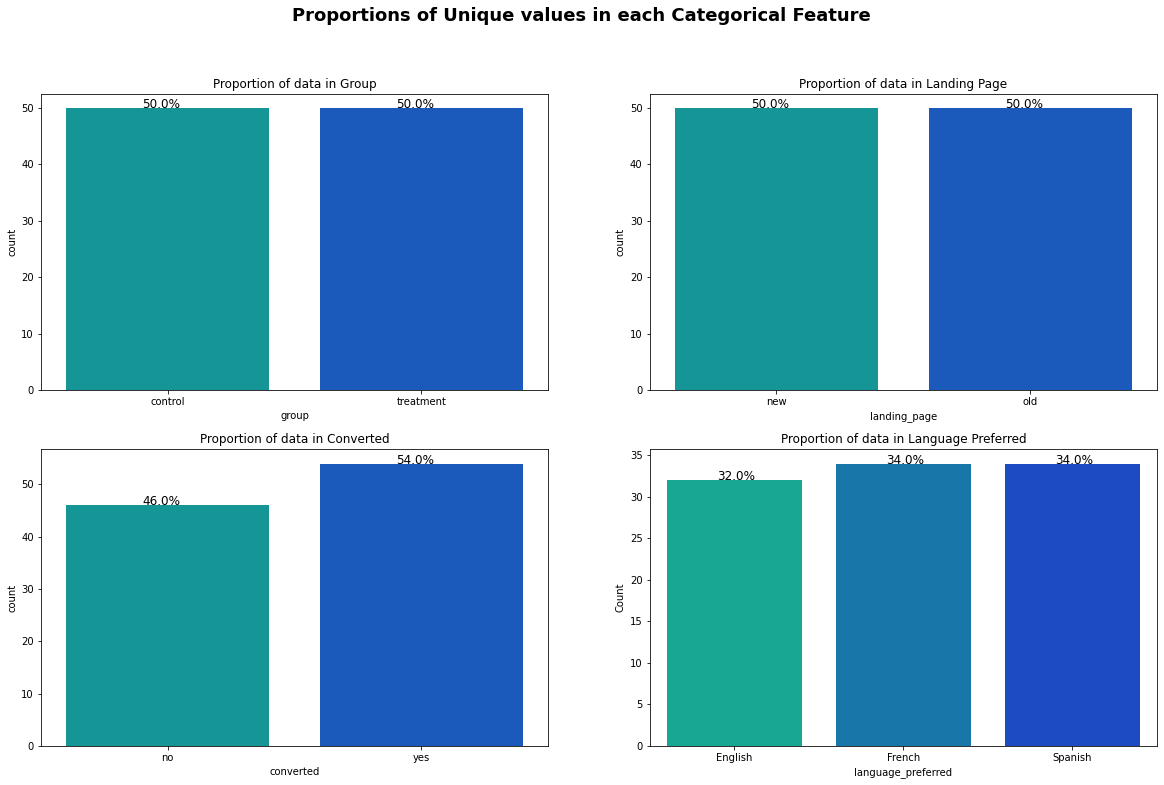

In [12]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2, figsize=(20,12)) #Create 2 rows and 2 column wise subplots
ax = sns.countplot(enews['group'],palette='winter_r',ax=ax1) #plotting first subplot
ax.set_title('Proportion of data in Group')
plt.ylabel('Count')
perc_annot(ax1,enews['group']) #perc_annot() function is used to show the percentages annotation
ax = sns.countplot(enews['landing_page'],palette='winter_r',ax=ax2) #plotting second subplot
ax.set_title('Proportion of data in Landing Page')
plt.ylabel('Count')
perc_annot(ax2,enews['landing_page'])
ax = sns.countplot(enews['converted'],palette='winter_r',ax=ax3) #plotting third subplot
ax.set_title('Proportion of data in Converted')
plt.ylabel('Count')
perc_annot(ax3,enews['converted'])
ax = sns.countplot(enews['language_preferred'],palette='winter_r',ax=ax4) #plotting fourth subplot
ax.set_title('Proportion of data in Language Preferred')
plt.ylabel('Count')
perc_annot(ax4,enews['language_preferred'])
plt.suptitle('Proportions of Unique values in each Categorical Feature',fontsize = 18, fontweight = 'bold')
plt.show()

### Observations:

- As we have observed the unique value counts before, this is a visual representation of the same counts.
- Proportions of control and treatment group and new and old landing page are 50% each in their category, which is inline with our understanding.
- Among the 100 samples provided in dataset 54% of the visitors are converted to subscribers
- Among 100 samples 34% of users preferred language is French, so for Spanish, where as 32% visitors preferred language English

## Let's explore the distribution of data in time_spent_on_the_page column

#### Below function will plot a boxplot and histogram and will be called to plot the distribution of time_spent_on_the_page column

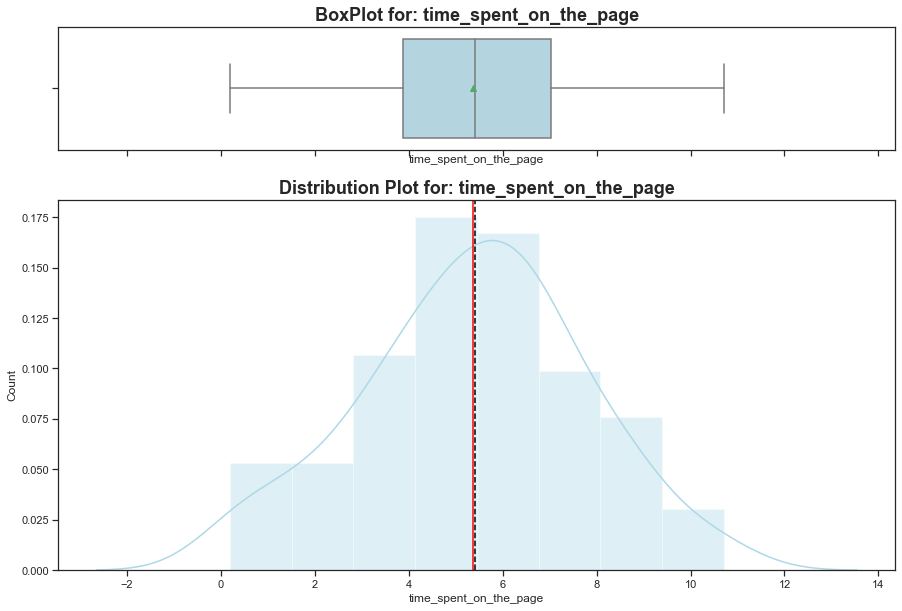

In [13]:
#Below is a function which will take input as numerical attributes, 
#titlevar to be able to dynamically populate the title for each plot
#figure size (to have the flexibility to have custom figsize if necessary), bins(for histogram) and 
#returns boxplot and histogram plot for the numerical attribute passed.
def box_hist(feature, titlevar, figsize=(15,10), bins = None):
    sns.set(style="ticks")
    fig,(axb,axh) = plt.subplots(nrows=2, #Number of rows to be plotted for subplot
                                 sharex = True, #x-axis will be shared for all subplots
                                 gridspec_kw = {"height_ratios": (.25, .75)}, #pass on the grid spaces to Gridspace constructor for subplots
                                 figsize = figsize
                                )
    sns.boxplot(feature,ax = axb,showmeans=True,color='lightblue') #plots the boxplot and show a marker for mean value
    axb.set_title('BoxPlot for: {}'.format(titlevar),fontweight = 'bold',fontsize = 18) 
    sns.distplot(feature,ax = axh,kde=True,bins = bins,color = 'lightblue') if bins else sns.distplot(feature,ax = axh,kde=True,color='lightblue') #plots histogram
    axh.axvline(np.mean(feature),linestyle = '-', color = 'red') #Add a red vertical line for mean value of the feature
    axh.axvline(np.median(feature),linestyle = '--', color = 'black') # Add a green vertical line for median value of the feature
    plt.ylabel('Count')
    axh.set_title('Distribution Plot for: {}'.format(titlevar),fontweight = 'bold',fontsize = 18)

box_hist(enews['time_spent_on_the_page'],'time_spent_on_the_page')

### Observations:

- Time spent on the page varies from less than 1 minute to ~11 minutes.
- Both boxplot and histogram shows the mean and the median of the data in time_spent_on_the_page column are almost similar.
- Data in time_spent_on_the_page tends to show the sign of normally distributed, as per central limit theorem with larger sample size this data will be normally distributed, hence for our further analysis we can consider it as normally distributed.
- We don't observe any outliers in the data.

## Bivariate Analysis


#### Note:
Since control group was served with old landing page, and treatment group served with new landing page, and we have established no null values present in landing page column, for further analysis we will not be using group column and dataset will be explored and key questions will be answered based on observations in landing page column as they are both binary in nature and gives the same count

## Let's check if the conversion rate differs based on landing page

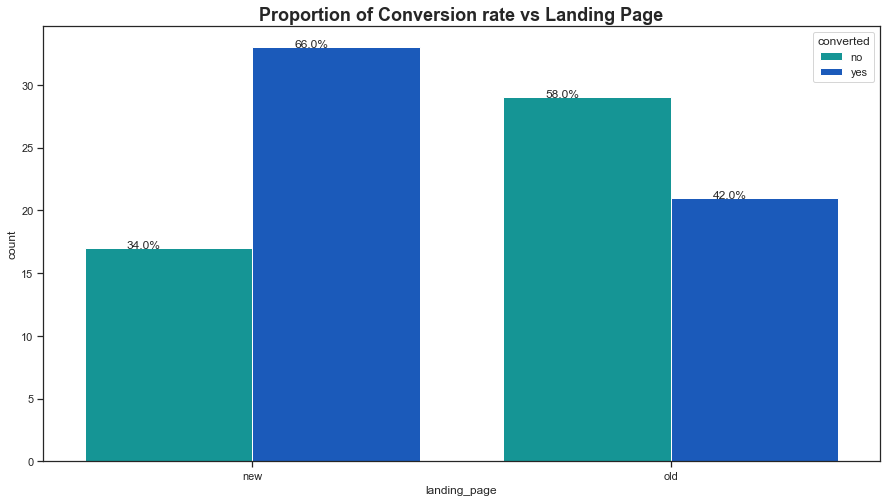

In [14]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(enews['landing_page'],hue=enews['converted'],palette='winter_r')
ax.set_title('Proportion of Conversion rate vs Landing Page',fontweight = 'bold',fontsize = 18)
#below code will calculate the conversion rate and annotate them in the plot for each patches
feature = enews['landing_page']
tot = (len(feature)) / 2 #calculate the total for each group, from prior finding each group has half of total data
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/tot) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.10 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x,y), size = 12) # annotate the percantage
    

### Observations:

- We can observe the new landing page has conversion rate as 66%, compared to the old landing page which has conversion rate as 42%.
- New landing page has higher conversion rate, will do further analysis to check if this is significant enough

## Let's also check how time spent on page differs based on landing page

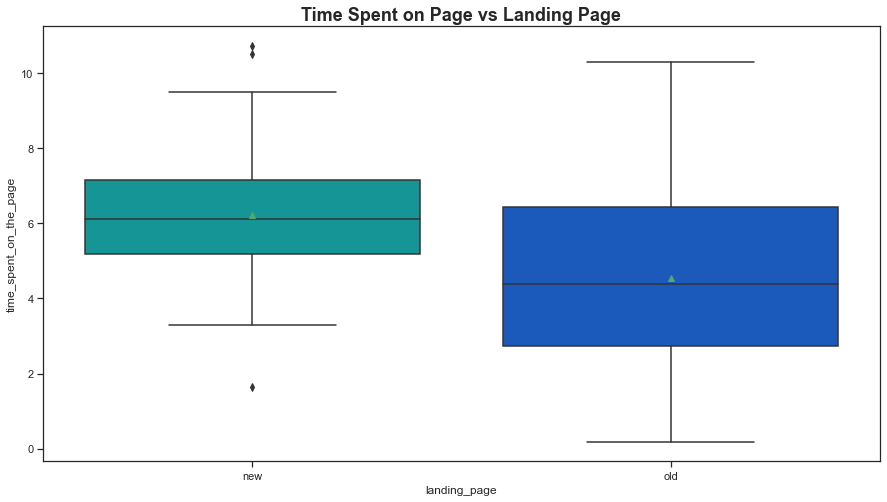

In [15]:
fig, ax = plt.subplots(figsize = (15,8)) #setting the figure size
#below code plots boxplot and show marker for mean value
ax = sns.boxplot(enews['landing_page'], enews['time_spent_on_the_page'], orient='v',palette='winter_r',showmeans=True)
ax.set_title('Time Spent on Page vs Landing Page',fontweight = 'bold',fontsize = 18)
plt.show()

### Observations:

- From the above plot we can observe the average time spent by the visitors on the new landing page is higher than old landing page.
- We can observe few outliers in the time spent for new landing page.

## Let's now explore the Time spent on page vs the Language Preferred

### We will visualize them separately for new and old landing page

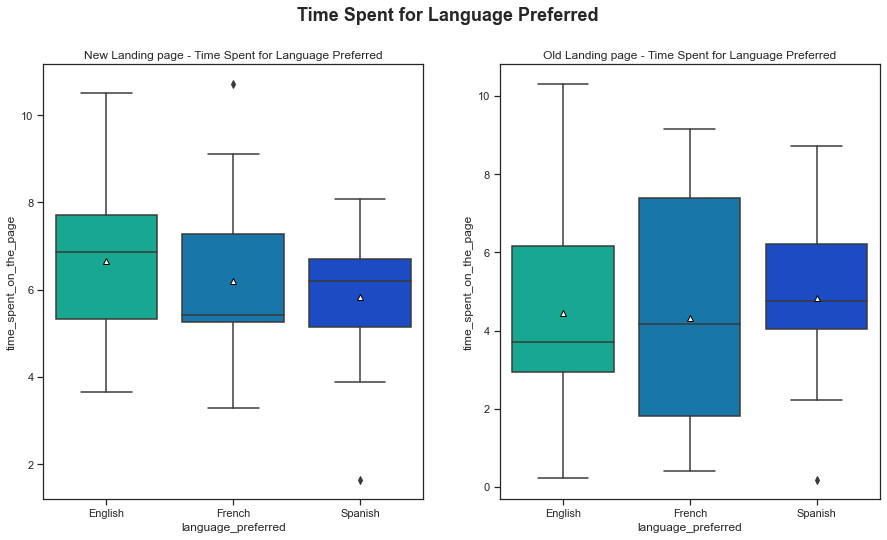

In [16]:
#filtering enews dataframe based on their landing page and creating two new dataframe
enews_new = enews[enews['landing_page'] == 'new']
enews_old = enews[enews['landing_page'] == 'old']

#Below code will plot two row wise subplot for time spend on the page vs language preferred as they are observed
#on each landing page
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,8)) #Create 1 rows and 2 column wise subplots
ax = sns.boxplot(enews_new['language_preferred'],enews_new['time_spent_on_the_page'],
                 palette='winter_r',ax=ax1,showmeans = True, 
                 meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}) #plotting first subplot
ax.set_title('New Landing page - Time Spent for Language Preferred')
ax = sns.boxplot(enews_old['language_preferred'],enews_old['time_spent_on_the_page'],
                 palette='winter_r',ax=ax2,showmeans = True,
                 meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}) #plotting second subplot
ax.set_title('Old Landing page - Time Spent for Language Preferred')
plt.suptitle('Time Spent for Language Preferred',fontsize = 18, fontweight = 'bold')
plt.show()

### Observations:

- We can observe the average time spent on the new landing page slightly differs based on the language preferred.
- Which tells us Visitors with preferred language as English are spending more time than other preferred language visitors in new landing page.
- Whereas in old landing page average time spent by the visitors are almost similar for any preferred languages

## Let's also check the time spent vs converted status

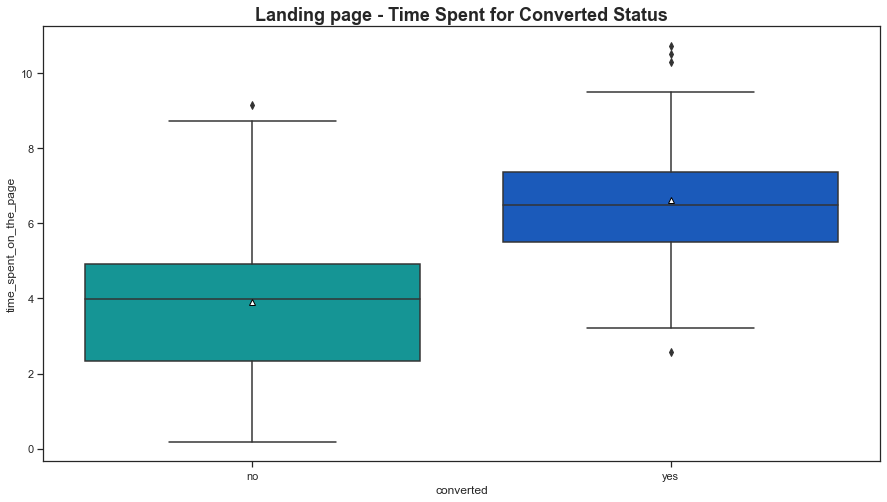

In [17]:
#Below code will plot boxplot for time spent vs landing page
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.boxplot(enews['converted'],enews['time_spent_on_the_page'],
                 palette='winter_r',showmeans = True, 
                 meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}) #plot boxplot
ax.set_title('Landing page - Time Spent for Converted Status', fontsize=18, fontweight='bold')
plt.show()

### Observations:

- Users with converted status as yes has spent greater than ~2 minutes on the page
- Average time spent on the page for the users converted to subscribers are more than who are not converted

## Let's explore the converted status based on language preferred

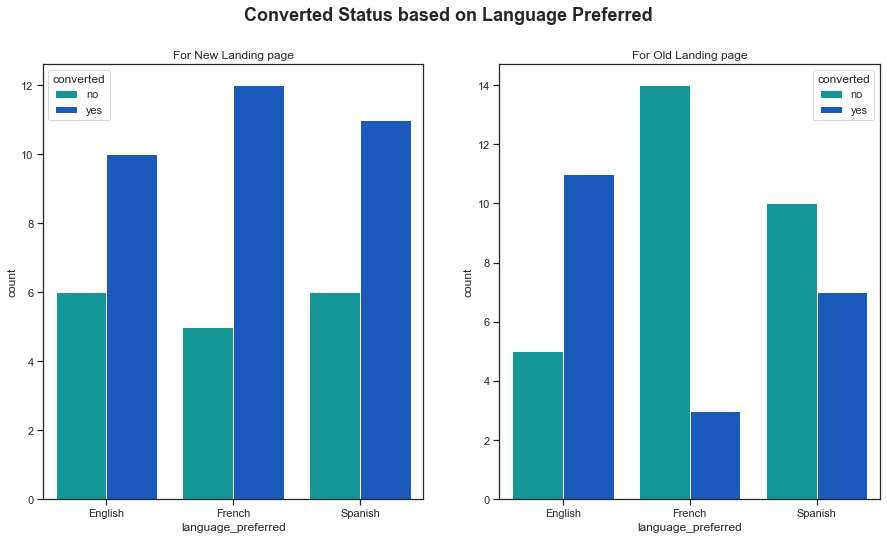

In [18]:
#Below code will plot two subplots based on landing page for converted status on their language preferred
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15,8))
ax = sns.countplot(enews_new['language_preferred'],hue=enews_new['converted'],palette='winter_r', ax=ax1)
ax.set_title('For New Landing page')
ax = sns.countplot(enews_old['language_preferred'],hue=enews_old['converted'],palette='winter_r', ax=ax2)
ax.set_title('For Old Landing page')
plt.suptitle('Converted Status based on Language Preferred',fontsize = 18, fontweight = 'bold')
plt.show()

### Observations:

- For new landing page there is not much difference on converted status based on their language preferred.
- Users of new landing page are subscribing more regardless of their language choice
- In case of old landing page visually we can notice for the visitors with language preferred as English has subscribed more than the other two languages. For French and Spanish non subscribers rate are higher.  

# Hypothesis Testing to answer Key questions

Now that we have explored the dataset and visually observed and noted down the key observations, it's time to perform some statistical analysis which will help us answer the key business questions.



**Level of Significance:** We were told to consider level of significance, $\alpha$ as **.05**

## 1. Key Question : Do the users spend more time on the new landing page than the old landing page?

In the dataset we have observed there are two groups, the control group was served with the old landing page and the treatment group was served with new landing page, business is interested to know if the users of new landing page spends more time than the old landing page.

### Let's write the null and alternative hypothesis


Let $\mu_1, \mu_2$ be the mean time spent on page of **New Landing Page** and **Old Landing Page** groups respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Let's test find the means and standard deviations for each group

In [19]:
print (f"The mean of time spent for new landing page is {enews_new['time_spent_on_the_page'].mean()} and the standard deviation is {enews_new['time_spent_on_the_page'].std()}")
print(' ')
print (f"The mean of time spent for old landing page is {enews_old['time_spent_on_the_page'].mean()} and the standard deviation is {enews_old['time_spent_on_the_page'].std()}")

The mean of time spent for new landing page is 6.2232 and the standard deviation is 1.8170310387878263
 
The mean of time spent for old landing page is 4.532400000000001 and the standard deviation is 2.581974849306046


### Visualize the mean time spent difference

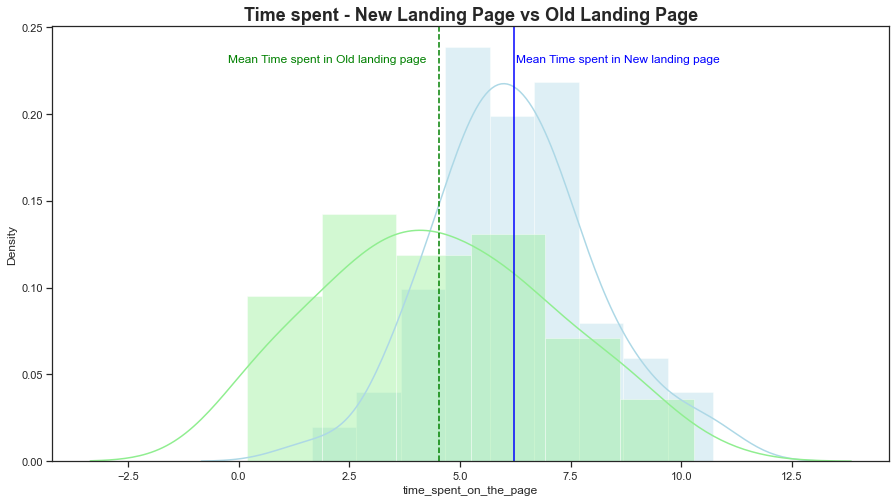

In [20]:
#Below code will plot the distribution of time spent for new page and old page in same figure.
fig, ax = plt.subplots(figsize = (15, 8))
sns.distplot(enews_new['time_spent_on_the_page'], color = 'lightblue', kde=True, rug=False)
sns.distplot(enews_old['time_spent_on_the_page'], color = 'lightgreen', kde=True, rug =False)
plt.axvline(enews_new['time_spent_on_the_page'].mean(),linestyle = '-', color = 'Blue') #Show blue solid mean line for new page
plt.axvline(enews_old['time_spent_on_the_page'].mean(),linestyle = '--', color = 'green') #Show green dotted line for old page
plt.annotate('Mean Time spent in New landing page', (6.27, 0.23), color = 'blue') #annotate the mean line for new page
plt.annotate('Mean Time spent in Old landing page', (-.25, 0.23), color = 'green') #annotate the mean line for old page
plt.title('Time spent - New Landing Page vs Old Landing Page', fontweight = 'bold', fontsize = 18)
plt.show()

### Observations:

- We can observe there is a difference in mean time spent, when it comes to new page vs the old page

### Let's test the assumptions for T-test are satisfied or not

- Continuous data: Yes, Time spent on the page is captured on continuous scale
- Normally Distributed population: Yes, we were told to assume the populations are normally distributed
- Independent Population: Yes, as we are taking samples from two different groups, the two samples are from two independent population
- Unequal population standard deviation: As the two sample deviation are different, the population sample deviations may be assumed different
- Random Sampling: Yes, we were told to assume it's a simple random sample.

#### We will be able to use T-test to answer this question

## Let's find out the p-value

In [21]:
#import the required functions
from scipy.stats import ttest_ind

#find p-value
test_stat, p_val = ttest_ind(enews_new['time_spent_on_the_page'],enews_old['time_spent_on_the_page'], 
                            equal_var=False,alternative='greater')

#### Let's write a function to print p-value and print the result of hypothesis test

In [22]:
def hypothesis_result(pval):
    print(f'The calculated p-value is {pval}')
    if pval < 0.05:
        print (f'As the p-value({pval}) is less than the level of significance 0.05, we can reject the Null Hypothesis')
    else:
        print (f'As the p-value({pval}) is not less than the level of significance 0.05, we fail to reject the Null Hypothesis')

        

#### Hypothesis test result

In [23]:
hypothesis_result(p_val)

The calculated p-value is 0.0001392381225166549
As the p-value(0.0001392381225166549) is less than the level of significance 0.05, we can reject the Null Hypothesis


### Conclusion

- As the p-value ~.0001 is less than the level of significance (.05) we can reject the Null Hypothesis. Hence, we do have enough evidence to say that Users are indeed spending more time in the new landing page.   

## 2. Key Question : Is the conversion rate for the new page greater than the conversion rate for the old page?

In the data set we have observations which tells us if the users are becoming subscribers or not (converted = 'yes') for each group control and treatment which was served old and new landing pages respectively. Business is interested to know if the new landing page has higher conversion rate.

### Let's write the null and alternative hypothesis

Let $p_1,p_2$ be the conversion rate of new landing page and old landing page respectively.

We will test the null hypothesis

>$H_0:p_1 = p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Data preparation for test

In [24]:
#Calculate the converted yes and no values from each sample and create filtered data frame for further use
new_converted_yes = enews_new[enews_new['converted'] == 'yes'].converted.value_counts()[0]
new_converted_no  = enews_new[enews_new['converted'] == 'no'].converted.value_counts()[0]
old_converted_yes = enews_old[enews_old['converted'] == 'yes'].converted.value_counts()[0]
old_converted_no  = enews_old[enews_old['converted'] == 'no'].converted.value_counts()[0]

print(f"New Landing Page: The value of converted 'yes' is {new_converted_yes} and 'no is' {new_converted_no}")
print(f"Old Landing Page: The value of converted 'yes' is {old_converted_yes} and 'no is' {old_converted_no}")

New Landing Page: The value of converted 'yes' is 33 and 'no is' 17
Old Landing Page: The value of converted 'yes' is 21 and 'no is' 29


In [25]:
#create a group by of data to visually represent
enews_grouped = enews.groupby(['landing_page', 'converted'])['converted'].count().unstack()
enews_grouped

converted,no,yes
landing_page,,
new,17,33
old,29,21


### Let's visually represent the converted status vs the landing page

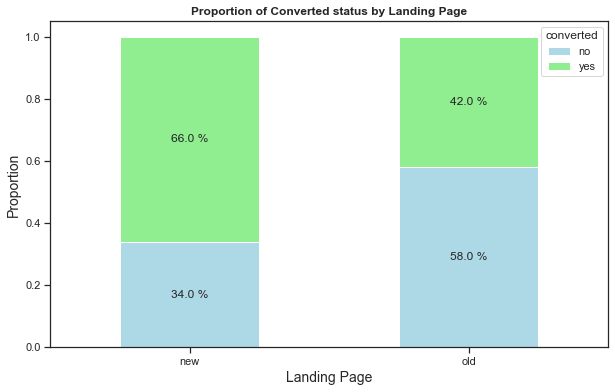

In [26]:
#Calculating the proportion to represent in the plot
enews_grouped_pc = enews_grouped.T.div(enews_grouped.T.sum()).T
#plotting the data in a stacked bar plot
ax=enews_grouped_pc.plot(kind='bar',stacked=True,figsize=(10,6),rot=0,color = ['lightblue','lightgreen'])
plt.ylabel('Proportion',fontsize = 14)
plt.xlabel('Landing Page',fontsize = 14)
plt.title('Proportion of Converted status by Landing Page',fontsize=12,fontweight='bold')
#Below loop will annotate the bar patches with it's respective percentages
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2          
    ax.text(x, 
            y, 
            '{:.1f} %'.format(height * 100), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.show()

### Observations:

- New landing page has 66% of conversion rate, whereas the old landing page has 42%

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, conversion is either yes or no.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT holds true. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

#### We will be able to use proportions z test

### Let's perform the test now and find the p-value

In [27]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_val = proportions_ztest([new_converted_yes,old_converted_yes], [50,50], alternative='larger')

#### Hypothesis test result

In [28]:
hypothesis_result(p_val)

The calculated p-value is 0.008026308204056278
As the p-value(0.008026308204056278) is less than the level of significance 0.05, we can reject the Null Hypothesis


### Conclusion

- As the p-value ~0.008 is less than the level of significance 0.05, we can reject the null hypothesis. Hence, we have enough statistical significance to say that the new landing page has increased the conversion rate

## 3. Key Question : Does the converted status depend on the preferred language? 

In the dataset we have observations of preferred language for each user, Business wants to know if users' conversion status has any dependency on their preferred language.

### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Converted status is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Converted status depends on preferred language.

### Data Preparation for test

We have to create a contingency table from the observations present in dataset before we can proceed for independence testing.

In [29]:
#Using pandas crosstab function to create a contingency table for language preferred and converted status
enews_conv_pl_ctab = pd.crosstab(enews['language_preferred'],enews['converted'],margins=False)
enews_conv_pl_ctab.index = ['English','French','Spanish'] #assigning column names
enews_conv_pl_ctab.columns = ['no','yes'] #assigning index names
enews_conv_pl_ctab.reset_index(level=0, inplace=True) #making index to a column in dataframe
print(enews_conv_pl_ctab)

     index  no  yes
0  English  11   21
1   French  19   15
2  Spanish  16   18


### Let's visualize this data

In [30]:
#create a group by of data to visually represent
enews_grouped_lg = enews.groupby(['language_preferred', 'converted'])['converted'].count().unstack()
enews_grouped_lg

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


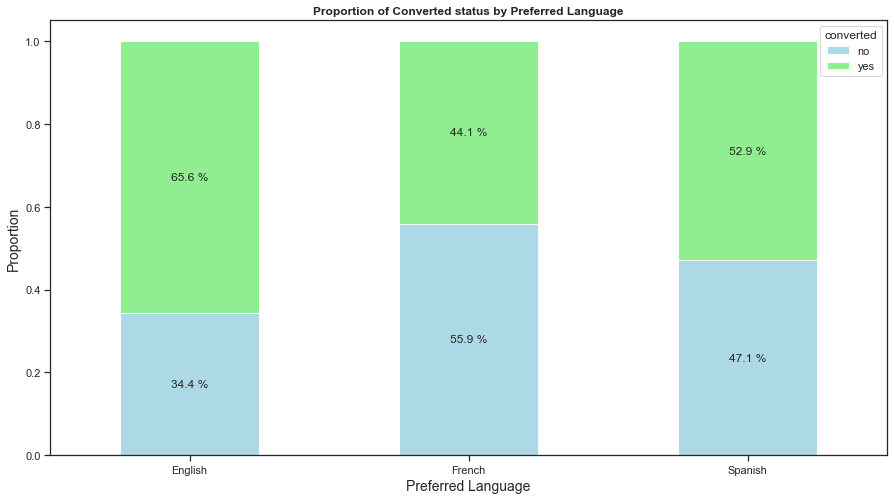

In [31]:
#Calculating the proportion to represent in the plot
enews_grouped__lg_pc = enews_grouped_lg.T.div(enews_grouped_lg.T.sum()).T
#plotting the data in a stacked bar plot
ax=enews_grouped__lg_pc.plot(kind='bar',stacked=True,figsize=(15,8),rot=0,color = ['lightblue','lightgreen'])
plt.ylabel('Proportion',fontsize = 14)
plt.xlabel('Preferred Language',fontsize = 14)
plt.title('Proportion of Converted status by Preferred Language',fontsize=12,fontweight='bold')
#Below loop will annotate the bar patches with it's respective percentages
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2          
    ax.text(x, 
            y, 
            '{:.1f} %'.format(height * 100), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.show()

### Observations:

- We can see that Users with preferred language as English has the higher converted status as yes with ~66%
- Spanish has the second highest conversion to subscribers with ~53% and French has the lowest conversion ~44%

### Let's check if the assumptions for chisquare test for independence holds good

- Categorical variables - Yes
- Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
- Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

#### We will be able to use chisquare test for independence

### Let's perform the test now and find p-value

In [32]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_val, dof, expected = chi2_contingency(enews_conv_pl_ctab.drop('index', axis = 1))

#### Hypothesis test result

In [33]:
hypothesis_result(p_val)

The calculated p-value is 0.2129888748754345
As the p-value(0.2129888748754345) is not less than the level of significance 0.05, we fail to reject the Null Hypothesis


### Conclusion

- As the p-value ~0.21 is much higher than the level of significance 0.05, we fail to reject the Null Hypothesis. Hence, there is not enough statistical evidence to conclude converted status has any dependency on their preferred language, in another way to say users becoming subscribers is not depending on their language preference 

## 4. Key Question: Is the mean time spent on the new page same for the different language users?

Based on the observations of time spent on page for different languages in new landing page, Business wants to know if the mean time spent is same for different language.

### Let's check what are the different preferred languges present in new landing page users

In [34]:
print(enews_new.language_preferred.value_counts())

French     17
Spanish    17
English    16
Name: language_preferred, dtype: int64


### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the page for languages French, Spanish and English respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one mean time spent is different from the rest.

### Data Preparation for the test

In [35]:
#filter the data require for testing based on language preferred
time_spent_new_french = enews_new['time_spent_on_the_page'][enews_new['language_preferred'] == 'French']
time_spent_new_spanish = enews_new['time_spent_on_the_page'][enews_new['language_preferred'] == 'Spanish']
time_spent_new_english = enews_new['time_spent_on_the_page'][enews_new['language_preferred'] == 'English']

#### Let's check the mean time spent values and plot one more time for easy reference

The mean time spent based on language preferred are 
 language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


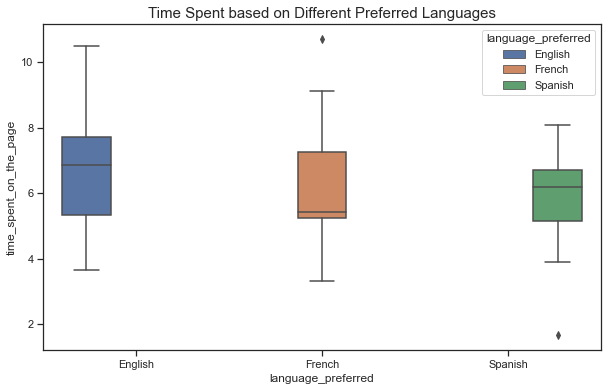

In [36]:
# mean of carbon emission at different levels of the fuel_type factor
print("The mean time spent based on language preferred are \n",enews_new.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.boxplot(x= 'language_preferred', y = 'time_spent_on_the_page' , data = enews_new, hue = 'language_preferred')
ax.set_title("Time Spent based on Different Preferred Languages", fontsize=15)
plt.show()

### Test for assumptions of normality and equality of variance in time spent data

#### Shapiro-Wilk’s test - For normality of time spent

We will test the null hypothesis

>$H_0:$ Time spent on new page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on new page does not follow a normal distribution

In [37]:
# import the required function
from scipy import stats

# find the p-value
w, p_val = stats.shapiro(enews_new['time_spent_on_the_page']) 
hypothesis_result(p_val)

The calculated p-value is 0.8040016293525696
As the p-value(0.8040016293525696) is not less than the level of significance 0.05, we fail to reject the Null Hypothesis


#### Conclusion of Normality test

- As the p-value is much higher than significance level 0.05, we fail to reject null hypothesis, so we can say we have enough statistical evidence to consider time spent follows normal distribution

### Levene’s test for equality of variance

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [38]:
#import the required function
from scipy.stats import levene

# find the p-value
statistic, p_val = levene(time_spent_new_french, time_spent_new_spanish, time_spent_new_english)

hypothesis_result(p_val)

The calculated p-value is 0.46711357711340173
As the p-value(0.46711357711340173) is not less than the level of significance 0.05, we fail to reject the Null Hypothesis


#### Conclusion of Normality test

- As the p-value is much higher than significance level 0.05, we fail to reject null hypothesis, so we can say we have enough statistical evidence to consider all population variances are equal

### Let's test whether the assumptions for oneway ANOVA are satisfied or not

- The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
- Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
- Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### Let's perform the test now and find p-value

In [39]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_val = f_oneway(time_spent_new_french,time_spent_new_spanish,time_spent_new_english)

### Hypothesis test result

In [40]:
hypothesis_result(p_val)

The calculated p-value is 0.43204138694325955
As the p-value(0.43204138694325955) is not less than the level of significance 0.05, we fail to reject the Null Hypothesis


### Conclusion:

- As the p-value ~0.43 is much higher than the significance level 0.05, we fail to reject the Null Hypothesis. hence, we can say we do not have enough statistical evidence to consider that the average time spent on the new page differ based on the preferred language

# Conclusion and Recommendation to Business

We have analyzed the gathered data of random sample of 100 users, 50 of them was served the old landing page and 50 of them were served with the new landing page. Upon all the exploratory and statistical data analysis we have done above, we could come up with the following conclusions and recommendations.

## Conclusion -

1. 54% of users are converted to subscribers.
2. New landing page has higher conversion rate as 66% compared to old page which has 42%.
3. French and Spanish users show trends of subscribing more in new page than old page. Though we do not have enough statistical evidence to say preferred language has any impact on conversion status.
4. Users spend less than 1 minute to ~11 minutes in the page, whereas subscribers spend minimum ~2 minutes in the page. 
5. Average usage time has significantly increased than old page.
6. Subscribers spend more time on the page than nonsubscribers.

## Recommendation -

1. Conversion rate is higher, new page should be rolled out to all users.
2. Average usage has been increased in new page, ensure the momentum continues by adding more relevant and engaging contents.
3. Even though the conversion rate has increased, there are still over ~30% of nonsubscribers in new page. A quick survey to gather reason of non subscribing and further analysis on that could point to further improvement leading to converting some of that population.
4. French and Spanish users have started subscribing more in the new page, even though we couldn’t conclude that preferred language has any impact on becoming subscribers, it must be ensured this momentum continues.
5. Gathering more attributes such as content specific time spent, user’s geo location and doing further analysis on them may lead to new findings of further improvement in conversion rate and usage.